In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.statespace.sarimax import SARIMAX

register_matplotlib_converters()

In [2]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [3]:
df_train = pd.read_csv("/kaggle/input/time-series-M4/Yearly-train.csv")
df_train = df_train.set_index("V1").T

df_train.index = np.arange(0,len(df_train))
df_train

V1,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,...,Y22991,Y22992,Y22993,Y22994,Y22995,Y22996,Y22997,Y22998,Y22999,Y23000
0,5172.1,2070.0,2760.0,3380.0,1980.0,1988.65,2158.96,2164.71,1921.437,1972.008,...,2416.0,2662.0,386.0,3639.76,520.98,470.0,4660.0,688.8,147.0,6850.0
1,5133.5,2104.0,2980.0,3670.0,2030.0,2073.59,2216.71,2169.77,1930.910,1997.897,...,2414.0,2665.0,471.0,3611.54,647.39,500.0,4220.0,462.5,379.0,6860.0
2,5186.9,2394.0,3200.0,3960.0,2220.0,2144.04,2252.75,2240.05,1962.385,2016.821,...,2385.0,2654.0,573.0,3643.73,735.75,572.0,4790.0,472.4,369.0,7020.0
3,5084.6,1651.0,3450.0,4190.0,2530.0,2147.85,2217.93,2294.09,1958.382,2030.903,...,2384.0,2660.0,526.0,3281.94,795.41,572.0,8800.0,495.1,149.0,7150.0
4,5182.0,1492.0,3670.0,4440.0,2610.0,2180.73,2215.01,2327.14,1969.578,2047.455,...,2370.0,2656.0,476.0,3288.25,886.05,609.0,10600.0,450.1,118.0,7240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_test = pd.read_csv("/kaggle/input/time-series-M4/Yearly-test.csv")
df_test = df_test.set_index("V1").T

df_test.index = np.arange(0, len(df_test))
df_test

V1,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,...,Y22991,Y22992,Y22993,Y22994,Y22995,Y22996,Y22997,Y22998,Y22999,Y23000
0,7290.2,1598.0,8440.0,9540.0,6840.0,3751.79,3169.24,2357.80,2234.891,2170.204,...,2611.0,2717.0,4608.0,12407.10,16973.76,2946.0,2510.0,708.6,6058.0,9010.0
1,7392.6,1366.0,8660.0,9790.0,7420.0,3854.54,3188.37,2357.19,2235.605,2162.900,...,2653.0,2782.0,4266.0,13496.58,16810.61,3072.0,1640.0,1049.2,3864.0,9320.0
2,7527.6,1288.0,8780.0,9940.0,7570.0,4003.45,3231.05,2359.22,2234.682,2181.906,...,2684.0,2797.0,4605.0,14540.49,16944.84,3387.0,3020.0,1542.8,3280.0,9560.0
3,7594.8,1148.0,8830.0,9940.0,8010.0,4229.12,3318.34,2346.79,2232.185,2167.475,...,2684.0,2778.0,5787.0,15566.60,17276.46,3608.0,4350.0,2390.3,1924.0,9720.0
4,7720.7,1139.0,8990.0,10110.0,8240.0,4502.05,3430.45,2349.57,2217.827,2135.708,...,2674.0,2776.0,5760.0,16088.66,17210.59,3649.0,1810.0,2108.4,1876.0,10000.0
5,7823.2,1062.0,9230.0,10400.0,8730.0,4741.77,3540.68,2352.89,2206.212,2122.196,...,2696.0,2843.0,7121.0,16973.76,17373.26,3594.0,2310.0,2283.3,1596.0,10090.0


# Original Series

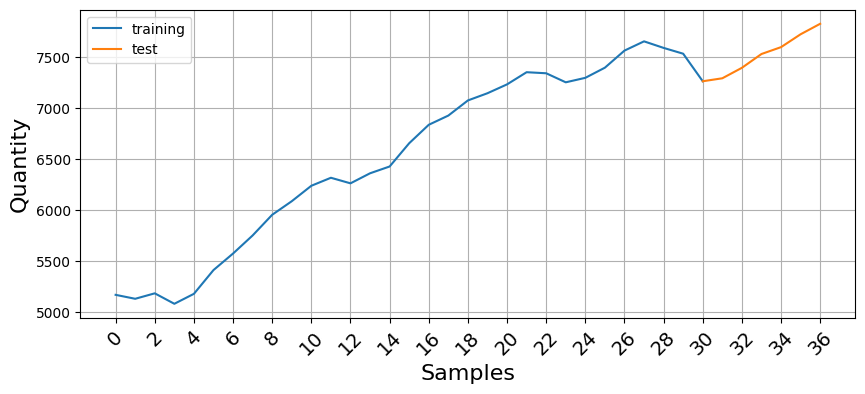

In [5]:
name = "Y1"
df_test.index = np.arange(len(df_train[name].dropna()), len(df_train[name].dropna()) + len(df_test))
ts = pd.concat([df_train[name].dropna(), df_test[name]])

plt.figure(figsize=(10,4))
plt.plot(ts[:-len(df_test)])
plt.plot(ts[-len(df_test)-1:])

plt.xticks(np.arange(0, ts.count()+1, 2), fontsize=14, rotation = 45)
plt.xlabel('Samples', fontsize=16)

#plt.yticks(np.arange(ts.min(),ts.max(),250), fontsize=14)
plt.ylabel('Quantity', fontsize=16)
plt.legend(["training", "test"])
plt.grid()

# ARIMA

In order to de-trend and de-seasonalize the samples, multiple instances of differences are applied on the time-series. For AR(p), MA(q), ARMA(p,q) and its various modifications, autocorrelation and partial autocorrelation coefficient charts illustrate potential $q$ and $p$ respectively.

#### 1st differencing

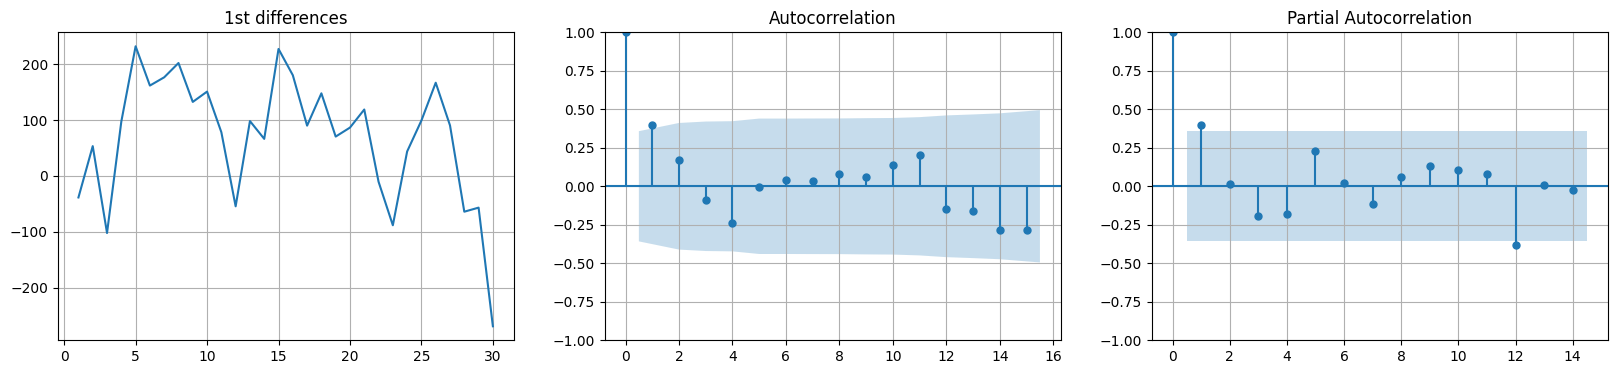

In [6]:
f = plt.figure(figsize=(20,4))
ax1 = f.add_subplot(131)
ax1.set_title("1st differences")
plt.grid()
ax1.plot(ts[:-len(df_test)].diff())

ax3 = f.add_subplot(132)
plot_acf(ts[:-len(df_test)].diff().dropna(), ax = ax3)
plt.grid()

ax2 = f.add_subplot(133)
plot_pacf(ts[:-len(df_test)].diff().dropna(), lags = len(ts[:-len(df_test)])//2 - 1, ax = ax2)
plt.grid()

plt.show()

1st differences chart clearly shows that there's still information to be extracted; thus, we apply differences again. There also seems to be significant autoregressive and innovation coefficients for $t-1$, which will be incorporated in our ARIMA model.

#### 2nd differencing

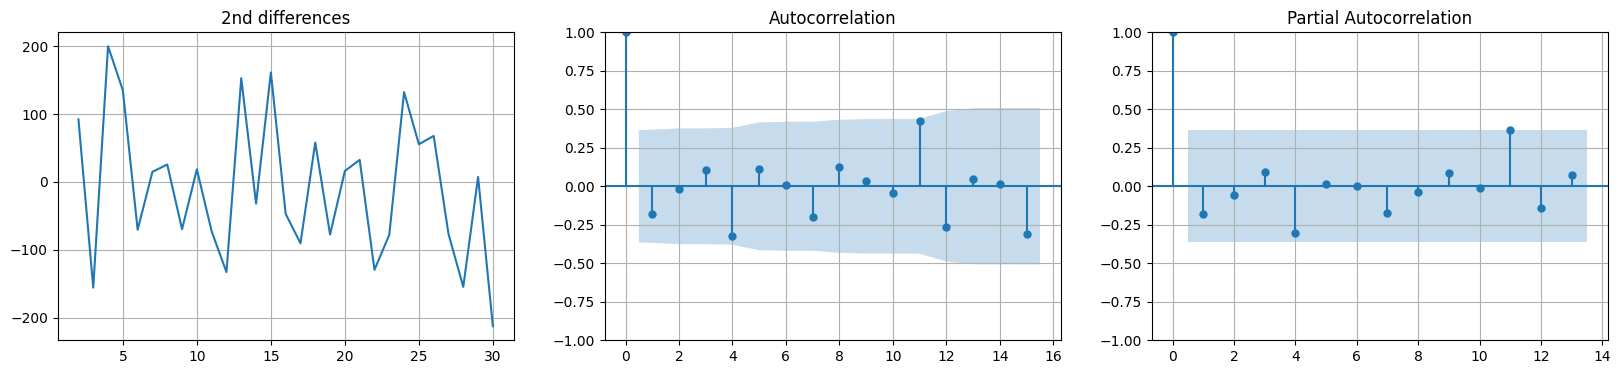

In [7]:
f = plt.figure(figsize=(20,4))
ax1 = f.add_subplot(131)
ax1.set_title("2nd differences")
plt.grid()
ax1.plot(ts[:-len(df_test)].diff().diff())

ax3 = f.add_subplot(132)
plot_acf(ts[:-len(df_test)].diff().diff().dropna(), ax = ax3)
plt.grid()

ax2 = f.add_subplot(133)
plot_pacf(ts[:-len(df_test)].diff().diff().dropna(), lags = len(ts[:-len(df_test)])//2 - 2, ax = ax2)
plt.grid()

plt.show()

2nd differences chart has mean =~ 0, therefore all bias has been extracted, at least the visible one.

#### check for p-value

Running augmented Dickey-Fuller tests is a more mathematically rigorous way to have conclusive evidence about trends and seasonality in our time-series. Any p-value about 0.05 (5%) tells us that there's still information to be extracted by differencing.

In [8]:
print("Order 1 diff")
perform_adf_test(ts[:-len(df_test)].diff().dropna())

print("\nOrder 2 diff")
perform_adf_test(ts[:-len(df_test)].diff().diff().dropna())

print("\nOrder 3 diff")
perform_adf_test(ts[:-len(df_test)].diff().diff().diff().dropna())

Order 1 diff
ADF Statistic: -2.081104
p-value: 0.252180

Order 2 diff
ADF Statistic: -3.589839
p-value: 0.005958

Order 3 diff
ADF Statistic: -4.493842
p-value: 0.000202


For 2nd differences, p-value drops below 5%, therefore $d$ in our ARIMA model will equal 2.

#### running the ARIMA model

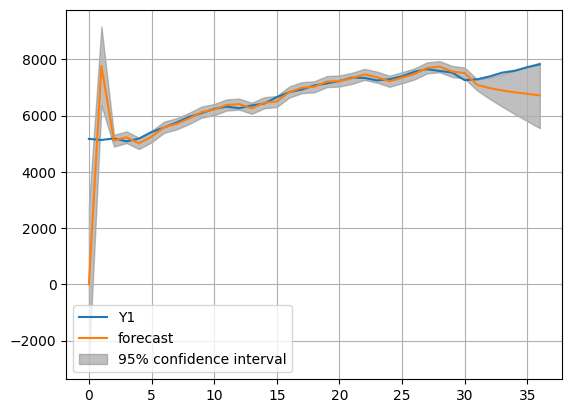

                               SARIMAX Results                                
Dep. Variable:                     Y1   No. Observations:                   31
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -174.868
Date:                Fri, 15 Sep 2023   AIC                            355.735
Time:                        16:13:29   BIC                            359.837
Sample:                             0   HQIC                           357.020
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5520      0.451      1.224      0.221      -0.332       1.436
ma.L1         -0.8675      0.414     -2.095      0.036      -1.679      -0.056
sigma2      1.008e+04   3340.638      3.017      0.0

In [9]:
#create the model
arima_model = ARIMA(ts[:-len(df_test)], order=(1, 2, 1))
model = arima_model.fit()

fig, ax = plt.subplots()
ax = ts.loc[0:].plot(ax=ax)

various = plot_predict(model, 0, len(ts) - 1, ax=ax) #len(ts) - len(df_test)
plt.grid()
plt.show()

print(model.summary())

In [10]:
y_pred = pd.Series(model.forecast(len(df_test)), index = ts[len(ts) - len(df_test):].index)
y_true = ts[len(ts) - len(df_test):]

mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true)) # mean absolute percentage error
mae = np.mean(np.abs(y_pred - y_true)) # mean absolute error
mpe = np.mean((y_pred - y_true)/y_true) # mean percentage error
rmse = np.mean((y_pred - y_true)**2)** 0.5 # RMSE
corr = np.corrcoef(y_pred, y_true)[0,1] # correlation coefficients

{"mape": mape, "mae": mae, "mpe": mpe, "rmse": rmse, "corr": corr}

{'mape': 0.08870600113617833,
 'mae': 677.4437772184447,
 'mpe': -0.08870600113617833,
 'rmse': 743.6280124533199,
 'corr': -0.988254463408001}

# Naive 1

#### repeating last known value

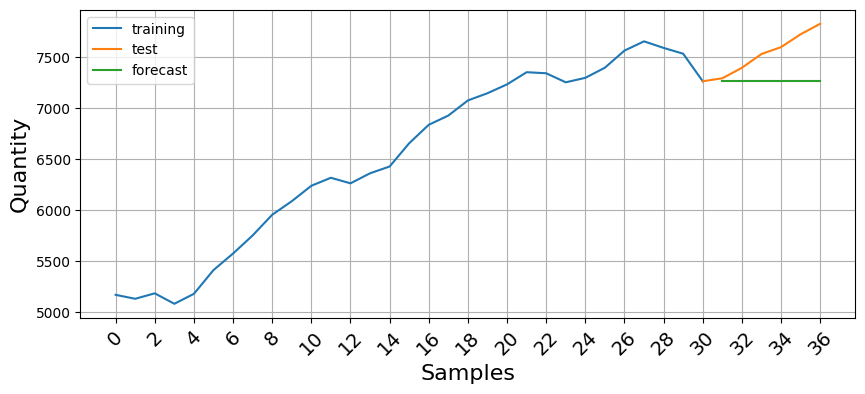

In [11]:
last_value = ts[len(df_train[name].dropna()) - 1]

y_pred = pd.Series(np.repeat(last_value, len(df_test)), index = ts[len(ts) - len(df_test):].index)

plt.figure(figsize=(10,4))
plt.plot(ts[:-len(df_test)])
plt.plot(ts[-len(df_test) - 1:])
plt.plot(y_pred)

plt.xticks(np.arange(0, ts.count()+1, 2), fontsize=14, rotation = 45)
plt.xlabel('Samples', fontsize=16)

plt.ylabel('Quantity', fontsize=16)
plt.legend(["training", "test","forecast", ])
plt.grid()

In [12]:
#y_true = ts[len(ts) - len(df_test):]

mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true)) # mean absolute percentage error
mae = np.mean(np.abs(y_pred - y_true)) # mean absolute error
mpe = np.mean((y_pred - y_true)/y_true) # mean percentage error
rmse = np.mean((y_pred - y_true)**2)** 0.5 # RMSE
corr = np.corrcoef(y_pred, y_true)[0,1] # correlation coefficients

{"mape": mape, "mae": mae, "mpe": mpe, "rmse": rmse, "corr": corr}

{'mape': 0.03874990013989824,
 'mae': 297.08333333333303,
 'mpe': -0.03874990013989824,
 'rmse': 348.2589003409194,
 'corr': 0.0}

# Naive S

#### repeating last $S$ values

Since data are yearly and sparse, data frequency/period/$S$ is set to 1. For period = 1, naive S degrades to naive 1.

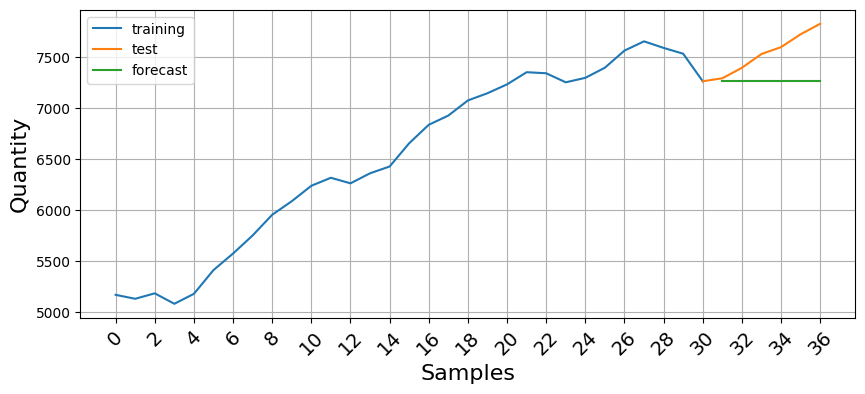

In [13]:
period = 1 
repeat = len(df_test) // period
y_pred = pd.Series(np.resize(ts[-len(df_test) -period :-len(df_test)].values, repeat*period + len(df_test) % period ), index = ts[-len(df_test):].index)

plt.figure(figsize=(10,4))
plt.plot(ts[:-len(df_test)])
plt.plot(ts[-len(df_test) - 1:])
plt.plot(y_pred)
plt.grid()

plt.xticks(np.arange(0, ts.count()+1, 2), fontsize=14, rotation = 45)
plt.xlabel('Samples', fontsize=16)

plt.ylabel('Quantity', fontsize=16)
plt.legend(["training", "test","forecast", ])
plt.show()

In [14]:
#y_true = ts[len(ts) - len(df_test):]

mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true)) # mean absolute percentage error
mae = np.mean(np.abs(y_pred - y_true)) # mean absolute error
mpe = np.mean((y_pred - y_true)/y_true) # mean percentage error
rmse = np.mean((y_pred - y_true)**2)** 0.5 # RMSE
corr = np.corrcoef(y_pred, y_true)[0,1] # correlation coefficients

{"mape": mape, "mae": mae, "mpe": mpe, "rmse": rmse, "corr": corr}

{'mape': 0.03874990013989824,
 'mae': 297.08333333333303,
 'mpe': -0.03874990013989824,
 'rmse': 348.2589003409194,
 'corr': 0.0}

It should be noted that, for period = {7, 8, 9}, forecast error is minimized.

# Naive 2

#### Autocorrelation 

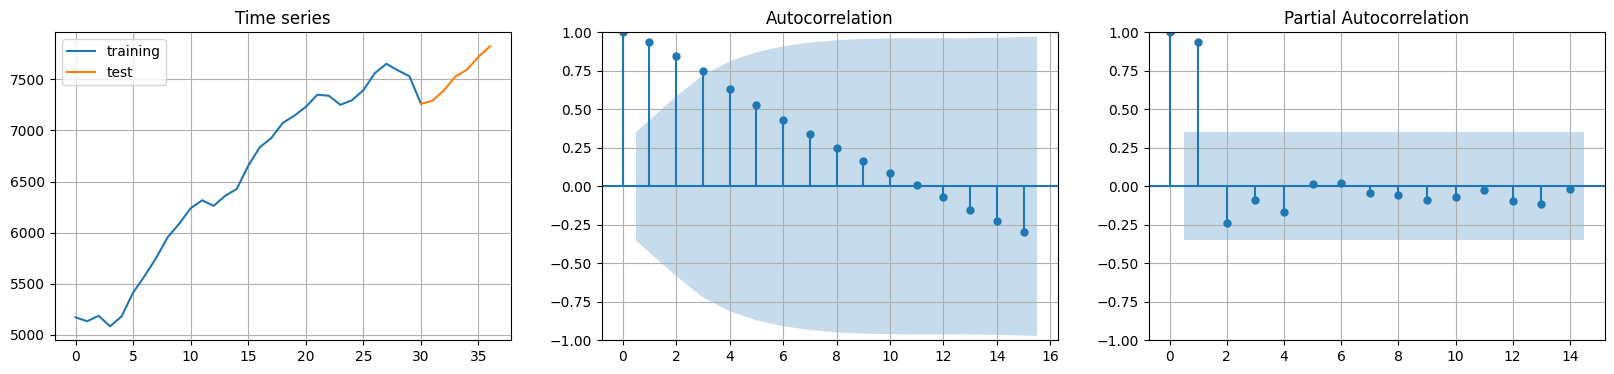

In [15]:
f = plt.figure(figsize=(20,4))
ax1 = f.add_subplot(131)
ax1.set_title("Time series")
ax1.plot(ts[:-len(df_test)])
ax1.plot(ts[-len(df_test) - 1:])
plt.legend(["training","test"])
ax1.grid()

ax2 = f.add_subplot(132)
plot_acf(ts[:-len(df_test)], ax = ax2)
plt.grid()

ax3 = f.add_subplot(133)
plot_pacf(ts[:-len(df_test)], lags = len(ts[:-len(df_test)])//2 -1, ax = ax3)
plt.grid()

plt.show()

Other than a handful of lags, the autocorrelations rapidly drop below 90%, which is our main seasonality criterion. Therefore, the time series shouldn't have any substantial seasonal component. Running multiplicative seasonal decomposition for various periods confirms our initial findings.

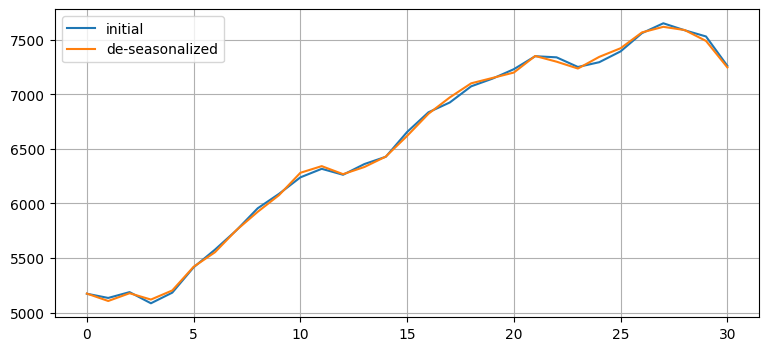

In [16]:
result = seasonal_decompose(ts[:-len(df_test)], period = 7, model='multiplicative') # using best-performing period from naive S
s_adjusted = ts[:-len(df_test)]/result.seasonal

f = plt.figure(figsize=(20,4))
ax1 = f.add_subplot(121)
plt.plot(ts[:-len(df_test)])
plt.plot(s_adjusted)
plt.legend(["initial", "de-seasonalized"])
plt.grid()

plt.show()

Evidently, any attempts to seasonally adjust the time-series failed to provide meaningful results, compared to naive 1.

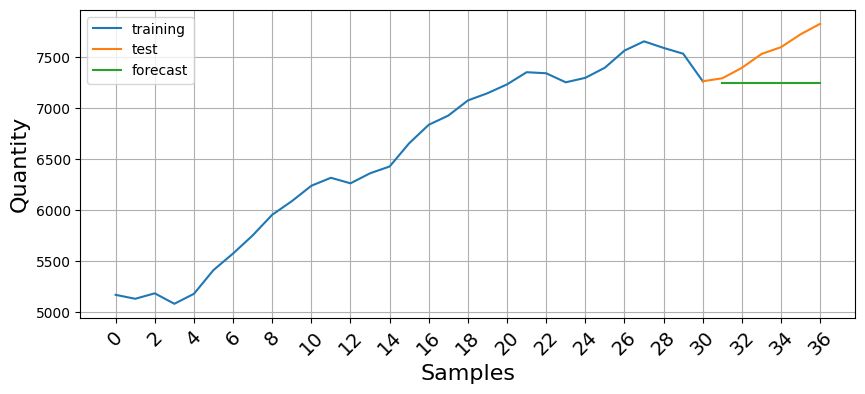

In [17]:
last_value = s_adjusted.tail(1)

y_pred = pd.Series(np.repeat(last_value.values, len(df_test)), index = ts[len(ts) - len(df_test):].index)
#y_pred = y_pred * result.seasonal[-len(df_test):]

plt.figure(figsize=(10,4))
plt.plot(ts[:-len(df_test)])
plt.plot(ts[-len(df_test) - 1:])
plt.plot(y_pred)

plt.xticks(np.arange(0, ts.count()+1, 2), fontsize=14, rotation = 45)
plt.xlabel('Samples', fontsize=16)

plt.ylabel('Quantity', fontsize=16)
plt.legend(["training", "test","forecast", ])
plt.grid()

In [18]:
#y_true = ts[len(ts) - len(df_test):]

mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true)) # mean absolute percentage error
mae = np.mean(np.abs(y_pred - y_true)) # mean absolute error
mpe = np.mean((y_pred - y_true)/y_true) # mean percentage error
rmse = np.mean((y_pred - y_true)**2)** 0.5 # RMSE

{"mape": mape, "mae": mae, "mpe": mpe, "rmse": rmse}

{'mape': 0.040649502303385994,
 'mae': 311.43256593295337,
 'mpe': -0.040649502303385994,
 'rmse': 360.5773118844356}